# Analyse des données du cancer de sein (Wisconsin Cancer)

## Partie III - Modeling

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from confusion_matrix_pretty_print import print_confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV,KFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.tree import export_graphviz



### Fonction d'affichage de la matrice de confusion (résultats)

In [123]:
#source https://github.com/shaypal5

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pretty print confusion matrix

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Récupération des données

In [151]:
cancer = pd.read_csv('data/simplified_data.csv',sep=",")
cancer = cancer.drop(columns = 'Unnamed: 0')

cancer['diagnosis'] = cancer['diagnosis'].map({'M':1,'B':0}) # plus simple pour le code après

In [150]:
from sklearn.preprocessing import StandardScaler

x = cancer.drop(columns='diagnosis')
y = cancer['diagnosis']

#Il faut absolument scale ici, sinon on a une erreur

standardized = StandardScaler()
standardized.fit(x)
x_norme = standardized.transform(x)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [63]:
x_train.head()

,texture_mean,area_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
149,17.91,585.0,0.06376,0.1473,0.05580
124,16.39,553.5,0.07325,0.1422,0.05823
421,13.98,656.1,0.18360,0.2086,0.07406
195,16.33,516.4,0.05366,0.1829,0.05667
545,23.23,573.2,0.06747,0.1664,0.05801


In [64]:
x_test.head()

,texture_mean,area_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
204,18.60,481.9,0.1058,0.1925,0.06373
70,21.31,1130.0,0.1029,0.1582,0.05461
131,19.48,748.9,0.1223,0.1931,0.05796
431,17.68,467.8,0.1316,0.1811,0.07102
540,14.44,402.9,0.1120,0.1818,0.06782


## Decision Tree model 

[Text(446.4, 489.24, 'X[1] <= 694.15\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(263.78181818181815, 380.52000000000004, 'X[2] <= 0.12\ngini = 0.235\nsamples = 279\nvalue = [241, 38]'),
 Text(162.3272727272727, 271.8, 'X[0] <= 19.61\ngini = 0.098\nsamples = 231\nvalue = [219, 12]'),
 Text(81.16363636363636, 163.08000000000004, 'X[0] <= 18.12\ngini = 0.012\nsamples = 165\nvalue = [164, 1]'),
 Text(40.58181818181818, 54.360000000000014, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(121.74545454545454, 54.360000000000014, 'gini = 0.051\nsamples = 38\nvalue = [37, 1]'),
 Text(243.49090909090907, 163.08000000000004, 'X[1] <= 562.55\ngini = 0.278\nsamples = 66\nvalue = [55, 11]'),
 Text(202.90909090909088, 54.360000000000014, 'gini = 0.077\nsamples = 50\nvalue = [48, 2]'),
 Text(284.07272727272726, 54.360000000000014, 'gini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(365.2363636363636, 271.8, 'X[1] <= 353.25\ngini = 0.497\nsamples = 48\nvalue = [22, 26]'),
 Text(324.

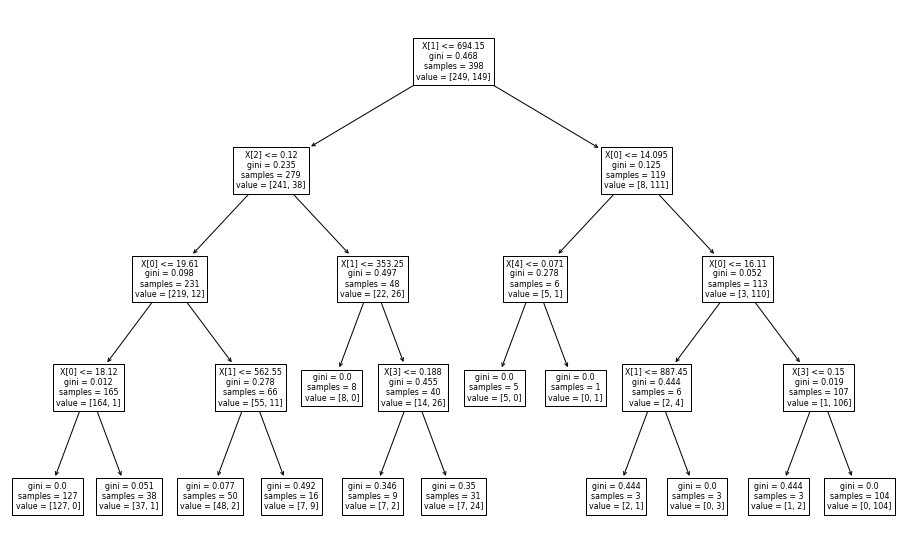

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model =  DecisionTreeClassifier(max_depth=4)
model.fit(x_train,y_train)

plt.figure(figsize=(16,10))
tree.plot_tree(model)


In [140]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       108
           1       0.89      0.86      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



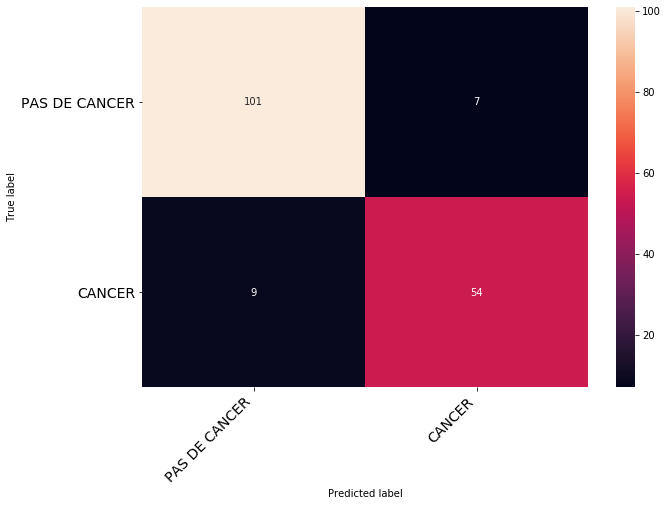

In [152]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)

cm = confusion_matrix(y_test,predictions)

print_confusion_matrix(cm, ['PAS DE CANCER','CANCER'], figsize = (10,7), fontsize=14)

In [142]:
# Précision du modèle 

precision = metrics.accuracy_score(predictions,y_test)
print("La précision du modèle Decision Tree :  %s" % "{0:.2%}".format(precision))

La précision du modèle Decision Tree :  91.23%


## Régression logistique 

In [143]:
x_train_, x_test_, y_train_, y_test_ = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=0)
model = LogisticRegression()
model.fit(x_train_,y_train_)
predictions_ = model.predict(x_test_)
print(classification_report(y_test_,predictions_))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       108
           1       0.89      0.86      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [144]:
cm1 = confusion_matrix(y_test,predictions_)
print(cm1) # boring printing

[[101   7]
 [  9  54]]


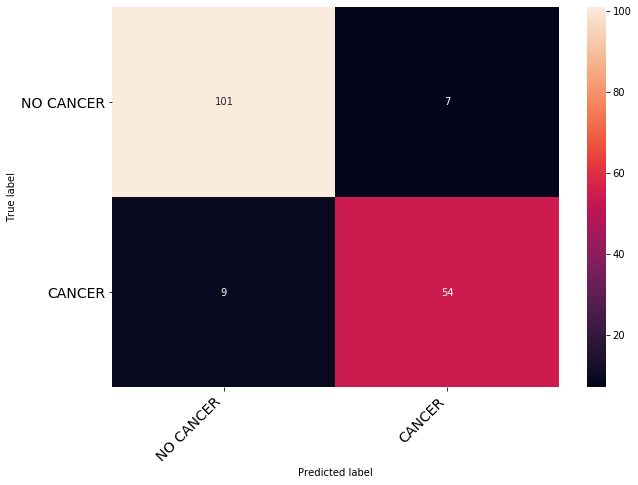

In [145]:
print_confusion_matrix(cm1, ['PAS DE CANCER','CANCER'], figsize = (10,7), fontsize=14)

In [146]:
# Précision du modèle 

precision = metrics.accuracy_score(predictions_,y_test_)
print("La précision de la régression logistique :  %s" % "{0:.2%}".format(precision))

La précision de la régression logistique :  90.64%


## Conclusion 

* Remarque : On avait le choix de faire l'analyse des données du cancer Wisconsin soit avec l'outil KNIME ou bien en python. Le choix a été rapide. Tout d'abord, c'est une occasion pour nous de se lancer sur Jupyter et apprendre du ML, de plus c'est une occasion pour découvrir comment les fonctions utilisés lors du projet marchent précisement, contrairement à KNIME où les appels internes sont un peu flous. Le facteur temps était aussi un motif pour ce choix (on avait le temps).

* Pour résumer les étapes qu'on a effectué pendant ce projet :
    - Une phase de préparation et récupération des données: on visualise notre dataset pour régler éventuellement des problèmes de données manquantes ou bien d'autres problèmes (renommer des variables etc..). On a aussi fait une phase d'analyse des corrélations entre variables du dataset.
    - Une phase d'exploration des données et de leurs visualisation : On a continué à analyser les corrélations entre les variables en utilisant deux outils; les boîtes à moustaches et les pairplots. ON est passé de 31 variables à seulement 6 variables ! 
    - Une phase de modélisation et de prédiction: Dans cette partie on a séparé notre dataset en deux parties, une partie de test, et une partie d'entrainement. Puis, on choisi deux modèles : la régression logisitique et le modèle de Decision Tree. L'idée ici est de comparer les résultats de ces deux modèles et de regarder lequels des deux est le plus performant et plus précis. C'est la phase machine learning du projet. 
    
* En comparant les modèles Decision Tree et la régression logistique, on remarque que le taux de précision du modèle 'Decision Tree' est supérieur à celui de l'autre modèle (92% vs 90), le modèle Decision Tree se trompe moins sur les échantillons test qui lui ont été fournis.
